# EQUAÇÕES DIFERENCIAIS

Equação diferencial é aquela que inclui as derivadas (possivelmente de ordem superior) das incógnitas. Por exemplo: 

Seja $y = f(x)$, um exemplo de equação diferencial é:

$$
\sum^N_{k=0}\frac{d^k y}{dx^k} = x + 3
$$

sujeita às condições:

$$
\frac{d^k y}{dx^k} (0) = k ,\quad k = 0, 1, 2, \dots, N
$$

A *ordem* de uma equação diferencial é a ordem da maior derivada presente nela. No exemplo acima, a ordem é $N$.

### EQUAÇÕES DIFERENCIAIS DE PRIMEIRA ORDEM SIMBÓLICAS

Exemplo: Resolver a equação diferencial $~~\displaystyle{\frac{dy}{dx} = -x}$

In [1]:
using SymPy

@syms x
@symfuns y

(y,)

In [2]:
typeof(y) , typeof(x)

(SymFunction, Sym)

In [3]:
edo1 = y'(x) + x 

    d       
x + ──(y(x))
    dx      

In [4]:
dsolve(edo1)

             2
            x 
y(x) = C₁ - ──
            2 

**Método específico:**

É possível resolver uma equação diferencial utilizando um método específico podendo ser: variáveis separadas, bernoulli entre outros.

In [5]:
dsolve(edo1, hint = "separable")

             2
            x 
y(x) = C₁ - ──
            2 

#### EQUAÇÃO DIFERENCIAL  DE PRIMEIRA ORDEM COM VALORES INICIAIS 

Exemplo: Resolver a equação diferencial $~~\displaystyle{\frac{dy}{dx} = -x}~~$ , $~~y(0) = 1$

In [6]:
using SymPy

@syms x
@symfuns y

(y,)

In [7]:
edo1 = y'(x) + x

    d       
x + ──(y(x))
    dx      

In [8]:
sol_simb =  dsolve(edo1, x, ics=(y, 0, 1))

            2
           x 
y(x) = 1 - ──
           2 

In [9]:
# Manipulando valores da solução
sol_simb(1)

y(1) = 1/2

In [10]:
# ou somente a função "y"
Y = rhs(sol_simb)

Y(1)

1/2

Exemplo: Calcular a equação diferencial $\displaystyle{ \frac{dy}{dx} = - xy ~~}$, $~~y(0) = 1$

In [11]:
using SymPy

@syms x
@symfuns y

(y,)

In [12]:
sol_simb2 =  dsolve( y'(x) + x*y(x)  , x , ics=(y,0,1))

          2 
        -x  
        ────
         2  
y(x) = ℯ    

In [13]:
# Manipulando valores da solução
sol_simb2(1)

        -1/2
y(1) = ℯ    

In [14]:
# ou somente a função "y"
Ys = rhs(sol_simb2) 

Ys(1) 

 -1/2
ℯ    

In [15]:
# ou ainda 
rhs(sol_simb2)(1)

 -1/2
ℯ    

#### GRÁFICO DA SOLUÇÃO DA EQUAÇÃO DIFERENCIAL DE PRIMEIRA ORDEM 

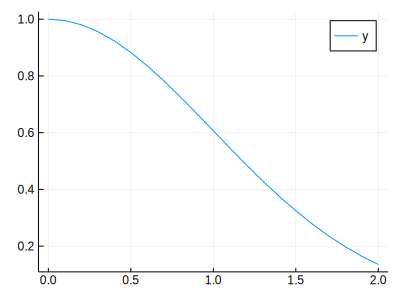

In [16]:
using Plots
gr()

plot((Ys), 0:0.1:2, size = (400, 300), label = "y")

## EQUAÇÕES DIFERENCIAIS DE SEGUNDA ORDEM

$\displaystyle{ y'' - 4y - x = 0}$ 

Exemplo: Resolva a equação diferencial $\displaystyle{ \frac{d^2y}{d^2x} = x + 4y}$

In [17]:
using SymPy

@syms x
@symfuns y

(y,)

In [18]:
edo2 = y''(x) - 4*y(x) - x

                2      
               d       
-x - 4⋅y(x) + ───(y(x))
                2      
              dx       

In [19]:
dsolve(edo2)

           -2⋅x       2⋅x   x
y(x) = C₁⋅ℯ     + C₂⋅ℯ    - ─
                            4

#### EQUAÇÃO DIFERENCIAL DE SEGUNDA ORDEM COM VALORES INICIAIS 

Exemplo: Resolva o problema de valor inicial  $~~\displaystyle{ \frac{d^2y}{d^2x} = x + 4y}~~$, $~~y(0)=1~~$ , $~~y'(0) = 0$

In [20]:
using SymPy

@syms x
@symfuns y

(y,)

In [21]:
edo2 = y''(x) - 4*y(x) - x

                2      
               d       
-x - 4⋅y(x) + ───(y(x))
                2      
              dx       

In [22]:
sol_simb_ord2 = dsolve(edo2, x, ics=[(y, 0, 1), (y', 0, 0)])

                2⋅x      -2⋅x
         x   9⋅ℯ      7⋅ℯ    
y(x) = - ─ + ────── + ───────
         4     16        16  

In [23]:
# manipulando ao solução geral 
sol_simb_ord2(1)

                -2      2
         1   7⋅ℯ     9⋅ℯ 
y(1) = - ─ + ───── + ────
         4     16     16 

In [24]:
# Manipulando a solução "y"
# ou somente a função "y"
Y2ord = rhs(sol_simb_ord2) 

Y2ord(1) 

         -2      2
  1   7⋅ℯ     9⋅ℯ 
- ─ + ───── + ────
  4     16     16 

In [25]:
# ou ainda
rhs(sol_simb_ord2)(1)

         -2      2
  1   7⋅ℯ     9⋅ℯ 
- ─ + ───── + ────
  4     16     16 

#### GRÁFICO DA SOLUÇÃO DA EQUAÇÃO DIFERENCIAL DE SEGUNDA ORDEM 

In [26]:
# função solução S
Y2ord

         2⋅x      -2⋅x
  x   9⋅ℯ      7⋅ℯ    
- ─ + ────── + ───────
  4     16        16  

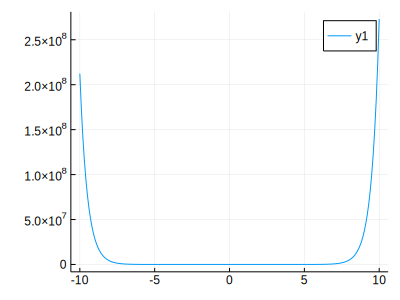

In [27]:
using Plots
gr()

plot(Y2ord, -10:0.1:10, size = (400,300))

# Pacote DifferentialEquations

Um pacote bem completo para lidar com equações diferenciais é o [DifferentialEquations](https://github.com/JuliaDiffEq/DifferentialEquations.jl) que possui um [tutorial (inglês)](https://github.com/JuliaDiffEq/DiffEqTutorials.jl) bem extenso. Abaixo são selecionados alguns exemplos de uso dele.

## Equações Diferenciais Ordinárias (EDO)

Seja a seguinte equação diferencial com condição inicial $u(0) = 1$:

$$
\frac{du}{dt} = f(u,p,t) = 0.98u
$$

Se queremos resolver este problema para $0 \le t \le 1$, então definimos um `ODEProblem` especificando a função `f`, a condição inicial `u0` e o intervalo `tspan`:

In [28]:
using DifferentialEquations
DE = DifferentialEquations

In [30]:
f(u,p,t) = 0.98u
u0 = 1.0
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 1.0

Enfim, resolvemos com a função `solve` que tem vários [argumentos opcionais](http://docs.juliadiffeq.org/latest/basics/common_solver_opts.html).

In [31]:
sol = DE.solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 5-element Array{Float64,1}:
 0.0                
 0.10042494449239292
 0.3521855598485865 
 0.6934428591625682 
 1.0                
u: 5-element Array{Float64,1}:
 1.0               
 1.1034222047865465
 1.4121902209793713
 1.9730369896422575
 2.664456142481387 

A solução `sol` é uma estrutura que tem os valores de $u$ e de $t$, e tem imbutida a interpolação dos resultados.

In [32]:
println("t = ", sol.t)
println("u = ", sol.u)
println("u(0.22) = ", sol(0.22))

t = [0.0, 0.10042494449239292, 0.3521855598485865, 0.6934428591625682, 1.0]
u = [1.0, 1.1034222047865465, 1.4121902209793713, 1.9730369896422575, 2.664456142481387]
u(0.22) = 1.2406060403303103


Ela pode ser plotada diretamente.

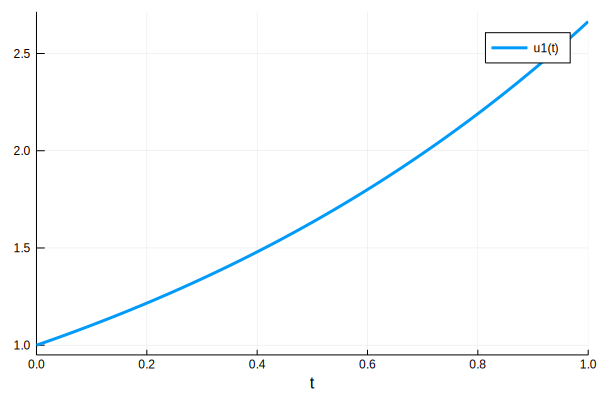

In [33]:
using Plots; gr()
plot(sol)

Se quisermos maior acurácia e precisão, podemos utilizar os argumentos de tolerância absoluta e relativa.

In [34]:
sol = DE.solve(prob, abstol=1e-8, reltol=1e-8)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 9-element Array{Float64,1}:
 0.0                
 0.04127492324135852
 0.14679466086219672
 0.2863090396112191 
 0.438184089090746  
 0.6118802875301362 
 0.7985514876572974 
 0.9993352795953876 
 1.0                
u: 9-element Array{Float64,1}:
 1.0               
 1.0412786454705882
 1.1547210130399164
 1.32390123501071  
 1.5363667984773475
 1.8214678404507973
 2.187108732054802 
 2.66272111108696  
 2.6644562419335163

Podemos ser explícitos em dizer que tipo de algoritmo usar para encontrar a solução; `Tsit5` no exemplo a seguir.

In [35]:
sol = DE.solve(prob, Tsit5(), reltol=1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 10-element Array{Float64,1}:
 0.0                 
 0.028970819746309166
 0.10049166978837214 
 0.19458902376186224 
 0.3071721467343173  
 0.43945340580499864 
 0.5883428480879211  
 0.7524861839187198  
 0.9293007851261506  
 1.0                 
u: 10-element Array{Float64,1}:
 1.0               
 1.0287982807225062
 1.103494360777622 
 1.2100930328474355
 1.3512481270061714
 1.5382791211530558
 1.7799334774107156
 2.0905693823853637
 2.486098887385528 
 2.6644562434913315

## Sistema de EDOs: Equação de Lorentz

A equação de Lorentz, que originou a Teoria do Caos, é definida pelo seguinte conjunto de equações:

$$
\begin{align}
\frac{dx}{dt} &= \sigma (y - x)\\
\frac{dy}{dt} &= x (\rho - z) -y\\
\frac{dz}{dt} &= xy - \beta z
\end{align}
$$

Para definirmos este sistema, fazemos `f` como uma função vetorial e a função derivada:

**Nota:** A função tem um `!` no final para indicar que ela modifica um (ou mais) argumento recebido. Ela foi feita desta forma por questão de eficiência computacional, para evitar que novos blocos de memória sejam alocados a cada vez que a função é chamada (que podem ser muitas durante a solução). Ao invés disso, os novos valores substituem os antigos.

In [36]:
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end

lorenz! (generic function with 1 method)

Definimos um vetor de condições iniciais $u_0$:

In [37]:
u0 = [1.0, 0.0, 0.0]

3-element Array{Float64,1}:
 1.0
 0.0
 0.0

Enfim, definimos nossa lista de parâmetros $p = (\sigma, \rho, \beta)$.

In [38]:
p = (10, 28, 8/3)

(10, 28, 2.6666666666666665)

Por fim, construimos nosso problema:

In [39]:
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!, u0, tspan, p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [1.0, 0.0, 0.0]

In [40]:
sol = DE.solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1250-element Array{Float64,1}:
   0.0                  
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032623883208835647
   0.00905805935549092  
   0.016956466266909925 
   0.027689961278342563 
   0.041856290192165115 
   0.06024018681535046  
   0.0836851555247397   
   0.11336440327474095  
   0.14862118771705435  
   0.18703915516368413  
   ⋮                    
  99.28043362469003     
  99.36407558603166     
  99.43552869744804     
  99.50064429327207     
  99.56497345673458     
  99.62788705014984     
  99.6991013016854      
  99.75654880247485     
  99.81017638953824     
  99.87131062092273     
  99.93558797583201     
 100.0                  
u: 1250-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]                                                   
 [0.9996434557625105, 0.0009988049817849058, 1.7814347887991892e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389215e-6

Podemos plotar:

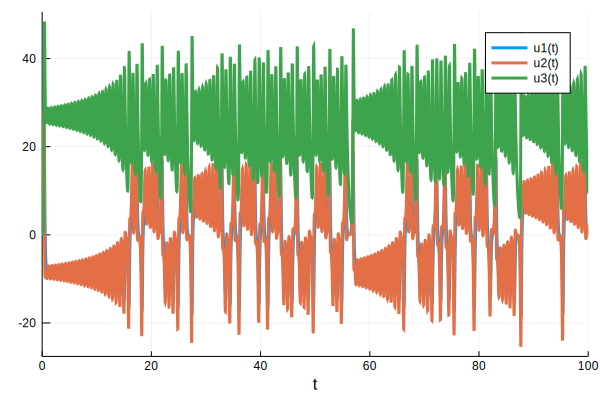

In [41]:
plot(sol)

Plot dos valores $u$ entre si:

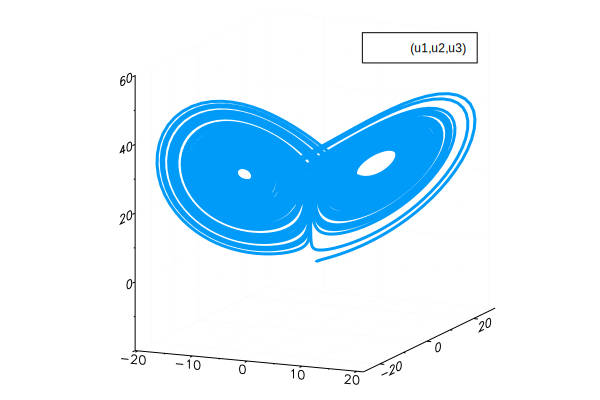

In [42]:
plot(sol,vars=(1,2,3))

### DSL Para Funções Parametrizadas

Em muitos casos, podemos ter que definir várias funções parametrizadas. Existe uma linguagem de domínio específico (DSL) definida pelo macro `@ode_def` para nos ajudar com este problema comum. Por exemplo, podemos definir a equação de Lotka-Volterra:

$$
\begin{align}
\frac{dx}{dt} &= ax - bxy\\
\frac{dy}{dt} &= -cy + dxy
\end{align}
$$

In [43]:
function lotka_volterra!(du,u,p,t)
  du[1] = p[1]*u[1] - p[2]*u[1]*u[2]
  du[2] = -p[3]*u[2] + p[4]*u[1]*u[2]
end

lotka_volterra! (generic function with 1 method)

No entanto, podemos usar o macro `@ode_def` de `ParameterizedFunctions.jl`:

In [44]:
using ParameterizedFunctions
lv! = @ode_def LotkaVolterra begin
  dx = a*x - b*x*y
  dy = -c*y + d*x*y
end a b c d

(::LotkaVolterra{getfield(Main, Symbol("##3#7")),getfield(Main, Symbol("##4#8")),getfield(Main, Symbol("##5#9")),Nothing,Nothing,getfield(Main, Symbol("##6#10")),Expr,Expr}) (generic function with 2 methods)

Podemos usar o resultado como uma EDO, assim como feito anteriormente:

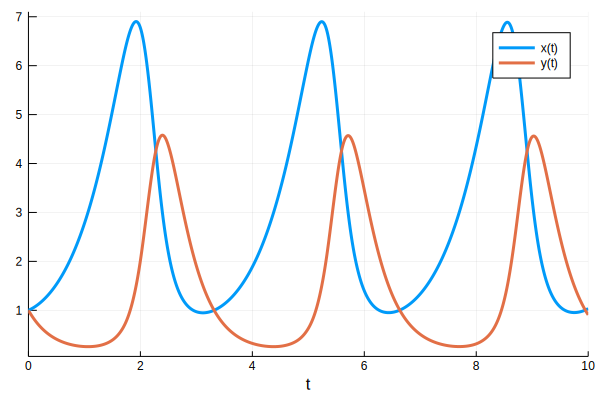

In [45]:
u0 = [1.0, 1.0]
p = (1.5, 1.0, 3.0, 1.0)
tspan = (0.0, 10.0)
prob = ODEProblem(lv!, u0, tspan, p)
sol = DE.solve(prob)
plot(sol)

Não so DSL é conveniente pela sintaxe, como ela tem algumas mágicas atrás da cortina. Por exemplo, ao resolver equações diferenciais rígidas (*stiff*), as quais são numericamente instáveis com certos algoritmos, é necessário calcular o Jacobiano. O DSL consegue deduzí-lo simbolicamente (ao invés de calcular numericamente para cada ponto da soulção), o quê acelera o processo de solução.

In [46]:
lv!.Jex

quote
    internal_var___J[1, 1] = internal_var___p[1] - internal_var___p[2] * internal_var___u[2]
    internal_var___J[1, 2] = -(internal_var___p[2]) * internal_var___u[1]
    internal_var___J[2, 1] = internal_var___p[4] * internal_var___u[2]
    internal_var___J[2, 2] = -(internal_var___p[3]) + internal_var___p[4] * internal_var___u[1]
    nothing
end

## Escolhendo um Algoritmo para EDOs

Enquanto os algoritmos padrões, juntamente com o parâmetro `alg_hints = [:stiff]`, são suficientes na maioria dos casos, há aqueles que é necessário ter mais controle. Introduziremos algumas escolhas de algoritmos populares e quando devem ser usados. Uma aspecto chave nessa escolha é saber se o problema é rígido (*stiff*) ou não. Tomaremos como exemplo a equação deVan Der Pol:

In [47]:
using DifferentialEquations, ParameterizedFunctions
van! = @ode_def VanDerPol begin
  dy = μ*((1-x^2)*y - x)
  dx = 1*y
end μ

prob = ODEProblem(van!,[0.0,2.0],(0.0,6.3),1e6)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 6.3)
u0: [0.0, 2.0]

Um fator indicativo que nos alerta que o modelo é rígido é um parâmetro ser grande (por exemplo, 1e6). Se tentarmos resolver com o método padrão:

In [48]:
sol = DE.solve(prob,Tsit5())

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ DiffEqBase /home/pedrohnv/.julia/packages/DiffEqBase/pqp0B/src/integrator_interface.jl:156


retcode: MaxIters
Interpolation: specialized 4th order "free" interpolation
t: 999978-element Array{Float64,1}:
 0.0                  
 4.997501249375313e-10
 5.4972513743128435e-9
 3.28990927256137e-8  
 9.055577676821075e-8 
 1.7309485648570045e-7
 2.793754678038464e-7 
 4.1495260542675094e-7
 5.807908778765186e-7 
 7.812798295243245e-7 
 1.019677142700131e-6 
 1.3021791104805163e-6
 1.6366004005585419e-6
 ⋮                    
 1.8458571798851746   
 1.8458586691597174   
 1.845860158436944    
 1.8458616477168546   
 1.845863136999449    
 1.8458646262847271   
 1.8458661155726892   
 1.8458676048633353   
 1.8458690941566653   
 1.8458705834526792   
 1.845872072751377    
 1.8458735620527589   
u: 999978-element Array{Array{Float64,1},1}:
 [0.0, 2.0]                                  
 [-0.0009987513736106552, 1.9999999999997504]
 [-0.010904339759596433, 1.9999999999699458] 
 [-0.06265537490349593, 1.9999999989523967]  
 [-0.15859483258498638, 1.9999999924944265]  
 [-0.2700359626

A saída `retcode: MaxIters` nos indica que o número máximo de iterações foi atingida. Outra coisa que pode acontecer é o solucionador ser instável e explodir (infinito) ou $dt$ ficar muito pequeno. Se estas coisas acontecem, é bom checar se nosso modelo está correto. Pode acontecer de termos entrado algum parâmetro incorreto...es the model to be unstable!

Se o problema for o próprio modelo (inerente a ele), então rigidez pode ser a razão. Podemos, então, indicar ao solucionador para usar um método apropriado:

In [49]:
sol = DE.solve(prob, alg_hints=[:stiff])

retcode: Success
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 698-element Array{Float64,1}:
 0.0                  
 4.997501249375313e-10
 5.454144814081546e-9 
 1.895429862942141e-8 
 4.1496571754120226e-8
 7.308069731316235e-8 
 1.1714619266129725e-7
 1.748124604665726e-7 
 2.486228497323632e-7 
 3.4025383636273316e-7
 4.52108282630325e-7  
 5.866767629330785e-7 
 7.473630214792003e-7 
 ⋮                    
 5.650660525588375    
 5.654854291557       
 5.679354514284589    
 5.725531937625142    
 5.780152662149032    
 5.85003347039626     
 5.928098795591691    
 6.0132622649822505   
 6.09993349783874     
 6.18660473069523     
 6.273275963551719    
 6.3                  
u: 698-element Array{Array{Float64,1},1}:
 [0.0, 2.0]                                  
 [-0.0009987513736106517, 1.9999999999997504]
 [-0.010819531300941947, 1.9999999999704139] 
 [-0.03685094263042786, 1.9999999996474487]  
 [-0.07803510452519899, 1.9999999983473205]  
 [-0.1

Ou podemos utilizar o algoritmo padrão mesmo, que é o `AutoTsit5(Rodas5())`, o qual detecta rigidez automaticamente e muda para um método apropriado quando ela é conhecida.

In [50]:
sol = DE.solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1927-element Array{Float64,1}:
 0.0                  
 4.997501249375313e-10
 5.4972513743128435e-9
 3.28990927256137e-8  
 9.055577676821075e-8 
 1.7309485648570045e-7
 2.793754678038464e-7 
 4.1495260542675094e-7
 5.807908778765186e-7 
 7.812798295243245e-7 
 1.019677142700131e-6 
 1.3021791104805163e-6
 1.6366004005585419e-6
 ⋮                    
 6.156257574728307    
 6.172986932423315    
 6.189121401963214    
 6.204647120248189    
 6.219555079857732    
 6.233840699796808    
 6.247503397670739    
 6.26054616938103     
 6.272975181287777    
 6.284799378752584    
 6.296030114058671    
 6.3                  
u: 1927-element Array{Array{Float64,1},1}:
 [0.0, 2.0]                                  
 [-0.0009987513736106552, 1.9999999999997504]
 [-0.010904339759596433, 1.9999999999699458] 
 [-0.06265537490349593, 1.9999999989523967]  
 [-0.15859483258498638, 1.9999999924944265]  
 [-0.27003596264015645,

Olhando a solução para entender melhor a rigidez:

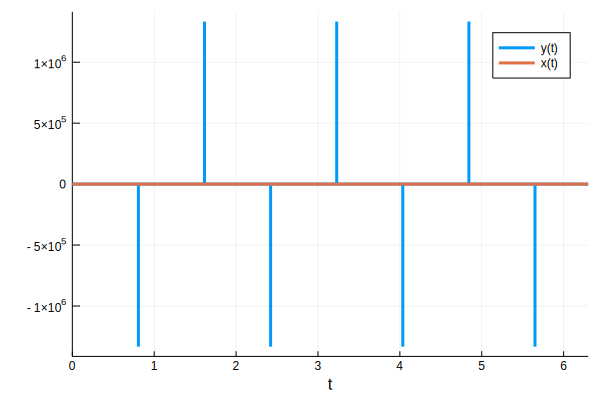

In [51]:
using Plots; gr()
sol = DE.solve(prob,alg_hints = [:stiff],reltol=1e-6)
plot(sol,denseplot=false)

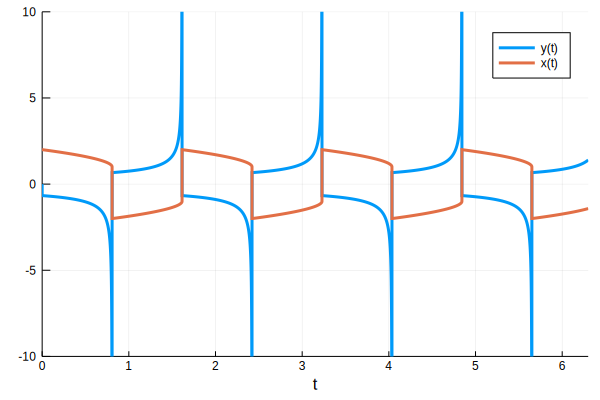

In [52]:
plot(sol,ylims = (-10.0,10.0))

Perceba que o valor das funções tende a explodir em certos pontos. Estes pontos tem a derivada grande demais e indicam rigidez.

Para escolher o melhor método, podemos utilizar BenchmarkTools para avaliar a eficiência para resolver usando um método rígido e um não-rígido.

In [53]:
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end
u0 = [1.0,0.0,0.0]
p = (10,28,8/3)
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [1.0, 0.0, 0.0]

In [54]:
using BenchmarkTools
@btime DE.solve(prob);
@btime DE.solve(prob,alg_hints = [:stiff]);

  1.155 ms (12674 allocations: 1.37 MiB)
  17.924 ms (68513 allocations: 2.84 MiB)


Pelo exemplo acima, vemos que um método não-rígido é melhor.

### Métodos Recomendados

Para selecionar um método, as seguintes regras se aplicam:

- Ordem maior é mais eficiente com tolerâncias menores, ordem menor é mais eficiente para tolerâncias maiores
    
- Apatatividade é essencial na maioria dos cenários do mundo-real
    
- Métodos de Runge-Kutta são bons para equações não-rígidas, métodos Rosenbrock são melhores com equações rígidas pequenas, métodos BDF são bons com equações rígidas grandes
    
Enquanto sempre há exceções para a regra, estes são bons princípios para se guiar. Baseado neles, uma maneira simples de selecionar um método é:

- O padrão é o `Tsit5()`, um método não-rígido de Runge-Kutta de ordem 5
    
- Se você usa tolerâncias baixas (1e-8), tente `Vern7()` ou `Vern9()`

- Se você usa tolerâncias grandes, tente `BS3()`

- Se o problema é rígido, tente `Rosenbrock23()`, `Rodas5()`, ou `CVODE_BDF()`

- Se você não sabe, use `AutoTsit5(Rosenbrock23())` ou `AutoVern9(Rodas5())`.

(Esta é uma versão simplificada do selecionador de algoritmo padrão)

## Eventos e Callback

Quando trabalhando com equações diferenciais, nosso sistema evoluirá através de muitos estados. Alguns estados particulares podem ser de nosso interesse, e dizemos que um ***"evento"*** é disparado quando nosso sistema alcança estes estados. Por exemplo, eventos podem incluir o momento que o sistema atinge determinada temperatura ou velocidade. Nos ***lidamos (handle)*** com eles com ***callbacks (ligar de volta)***, que diz o quê fazer quando um evento foi disparado.

Estes *callbacks* permitem muito mais do quê lidar com eventos, no entanto. Por exemplo, podemos usá-los para obter um comportamento de alto nível para preservar exatamente as leis de conservação de energia e salvar o traço de uma matriz em pontos pré-definidos de tempo. Esta funcionalidade extra permite-nos usar o sistema de *callback* como um sistema de modificação para o ecossitema de solucionadores do DiffEq.

Alguns dos usos das funções para lidar com eventos e *callbacks* são introduzidas a seguir.

### Eventos e Callbacks Contínuos

Tratamento de eventos é feito através de *callbacks* contínuos. *Callbacks* tomam uma função, `condição`, que dispara um efeito (`affect!`) quando `condição == 0`. Estes *callbacks* são chamados "contínuos" porquê encontram as raízes na interpolação para saber o ponto "exato" no qual a condição ocorre e aplica o efeito (`affect!`) neste ponto.

***Vamos usar uma bola quicando como um sistema simples para explicar eventos e callbacks.***

Vamos usar o modelo de Newton de uma bola caindo em direção ao solo através da constante gravitacional `g`. Neste caso, a velocidade está mudando via `-g`, e a posição muda via velocidade. Portanto temos o seguinte sistema de EDOs:

In [55]:
using DifferentialEquations, ParameterizedFunctions
ball! = @ode_def BallBounce begin
  dy =  v
  dv = -g
end g

(::BallBounce{getfield(Main, Symbol("##21#25")),getfield(Main, Symbol("##22#26")),getfield(Main, Symbol("##23#27")),Nothing,Nothing,getfield(Main, Symbol("##24#28")),Expr,Expr}) (generic function with 2 methods)

Queremos que o *callback* dispare quando `y=0`, pois é nesta posição que a bola atinge o solo (nosso evento). Fazemos isto com a condição:

In [56]:
function condition(u,t,integrator)
  u[1]
end

condition (generic function with 1 method)

Lembre-se que a condição disparará quando ela for zero, e isto acontecerá aqui quando `u[1] == 0`, que ocorre quando `v == 0`. Agora temos que dizer o quê o *callback* fará. Eles fazem uso da [Interface Integrator](http://docs.juliadiffeq.org/latest/basics/integrator.html). Uma descrição resumida dele é a seguinte:

- Os valores são armazenados em `integrator.u`

- Os tempos são armazenados em `integrator.t`

- Os parâmetros são armazenados em `integrator.p`

- integrator(t) faz uma interpolação no intervalo atual entre `integrator.tprev` e `integrator.t` (e permite extrapolação)

- Opções definidas pelo usuário (tolerâncias, etc.) são armazenadas em `integrator.opts`

- `integrator.sol` é o objeto da solução atual. Note que `integrator.sol.prob` é o problema atual

Por mais que esta descrição seja muito breve, é um conhecimento suficiente do quê há.

O quê queremos fazer com nosso efeito (`affect!`) é causar o quique da bola. Matematicamente falando, a bola quica quando o sinal da velocidade muda. Como um comportamento adicional, vamos usar uma pequena constante de fricção para amortecer a velocidade da bola. Desta maneira, apenas uma porcentagem da velocidade será mantida quando o evento disparar. Vamos definir este comportamente na função `affect!`:

In [57]:
function affect!(integrator)
    integrator.u[2] = -integrator.p[2] * integrator.u[2]
end

affect! (generic function with 1 method)

`integrator.u[2]`é o segundo valor no nosso modelo, que é `v` ou velocidade, e `integrator.p[2]` é o nosso coeficiente de fricção.

Portanto `affect!` pode ser lido da seguinte forma: tome o valor atual da velocidade, multiplique-o por -1 e pelo coeficiente de fricção. Assim sendo, a bola mudará de direção e sua velocidade será amortecida quando `affect!` for chamada.

Agora construímos nosso `ContinuousCallback`, o nosso problema propriamente, e depois o solucionamos:

In [58]:
bounce_cb = ContinuousCallback(condition,affect!)

ContinuousCallback{typeof(condition),typeof(affect!),typeof(affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),Float64,Int64,Nothing}(condition, affect!, affect!, DiffEqBase.INITIALIZE_DEFAULT, nothing, true, 10, Bool[1, 1], 2.220446049250313e-15, 0)

In [59]:
u0 = [50.0, 0.0]
tspan = (0.0, 15.0)
p = (9.8, 0.9)
prob = ODEProblem(ball!, u0, tspan, p, callback=bounce_cb)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 15.0)
u0: [50.0, 0.0]

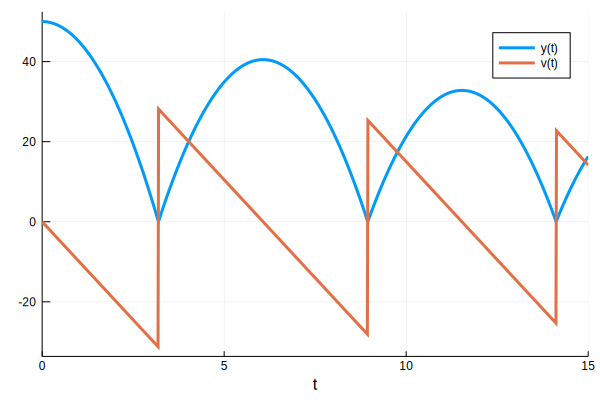

In [60]:
sol = DE.solve(prob,Tsit5())
using Plots; gr()
plot(sol)

e *TADA*, a bola quica! Note que `ContinuousCallback` está usando interpolação para aplicar o efeito "exatamente" quando `v==0`. Isto é crucial para a correção do modelo e, quando esta propriedade é necessária, um `ContinuousCallback` deve ser usado.